The purpose of this code is to provide some information of how to classify an image. The goal is to classify images into one of two categories using different strategies, including a basic CNN from scratch, a deeper CNN model for more complex tasks, and a pretrained model for leveraging state-of-the-art performance via transfer learning. <br />


Different Models: <br />
= Standard Model: A basic CNN suitable for tasks where computational resources are limited or for building simple models from scratch. <br />
= HealthApp Model: A slightly deeper CNN that can learn more complex patterns in the data and is ideal for slightly more complex tasks. <br />
= Pretrained Model: A transfer learning approach using a state-of-the-art pretrained model (EfficientNetB0), ideal for more advanced tasks where high accuracy and feature extraction are crucial. <br />

Some resourced used: 
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb
- https://www.kaggle.com/code/muhammadfaizan65/knee-arthritis-detection-using-efficientnetb0/notebook
- data from https://github.com/LIamB12/health-app-backend/blob/main/app.py 

In [34]:
# check available memory of codespace!! 
import psutil

# Get the memory info
memory_info = psutil.virtual_memory()
available_memory = memory_info.available / (1024 ** 2)  # Convert bytes to MB
print(f"Available Memory: {available_memory:.2f} MB")



Available Memory: 38449.75 MB


to free some memory:<br />
echo 1 | sudo tee /proc/sys/vm/drop_caches 

In [1]:
# Import required libraries
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                                     Dropout, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0



2024-10-14 13:44:48.888357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-14 13:44:49.002581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-14 13:44:49.002605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-14 13:44:49.026123: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 13:44:49.637530: W tensorflow/stream_executor/platform/de

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# load and this image function clasifies image based on directory 
data_dir = '/workspaces/ATAi_advance_notebooks/arthritis_data/all_images/'
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(400,400))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()



Found 2060 files belonging to 2 classes.


2024-10-14 13:44:50.723094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-10-14 13:44:50.723127: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-14 13:44:50.723153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-ec4b37): /proc/driver/nvidia/version does not exist
2024-10-14 13:44:50.723419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(f'Total number of batches: {data.cardinality()}')
print(f'Class names: {data.class_names}')

for images, labels in data.take(1):  # Take one batch
    print(f'Images shape: {images.shape}')
    print(f'Labels shape: {labels.shape}')


Total number of batches: 65
Class names: ['Normal', 'Osteoarthritis']


Images shape: (32, 400, 400, 3)
Labels shape: (32,)


In [5]:
# Check the shape of the first few images
for idx in range(5):  # Display the shape of the first 5 images
    print(f"Image {idx} shape: {batch[0][idx].shape}")

Image 0 shape: (400, 400, 3)
Image 1 shape: (400, 400, 3)
Image 2 shape: (400, 400, 3)
Image 3 shape: (400, 400, 3)
Image 4 shape: (400, 400, 3)


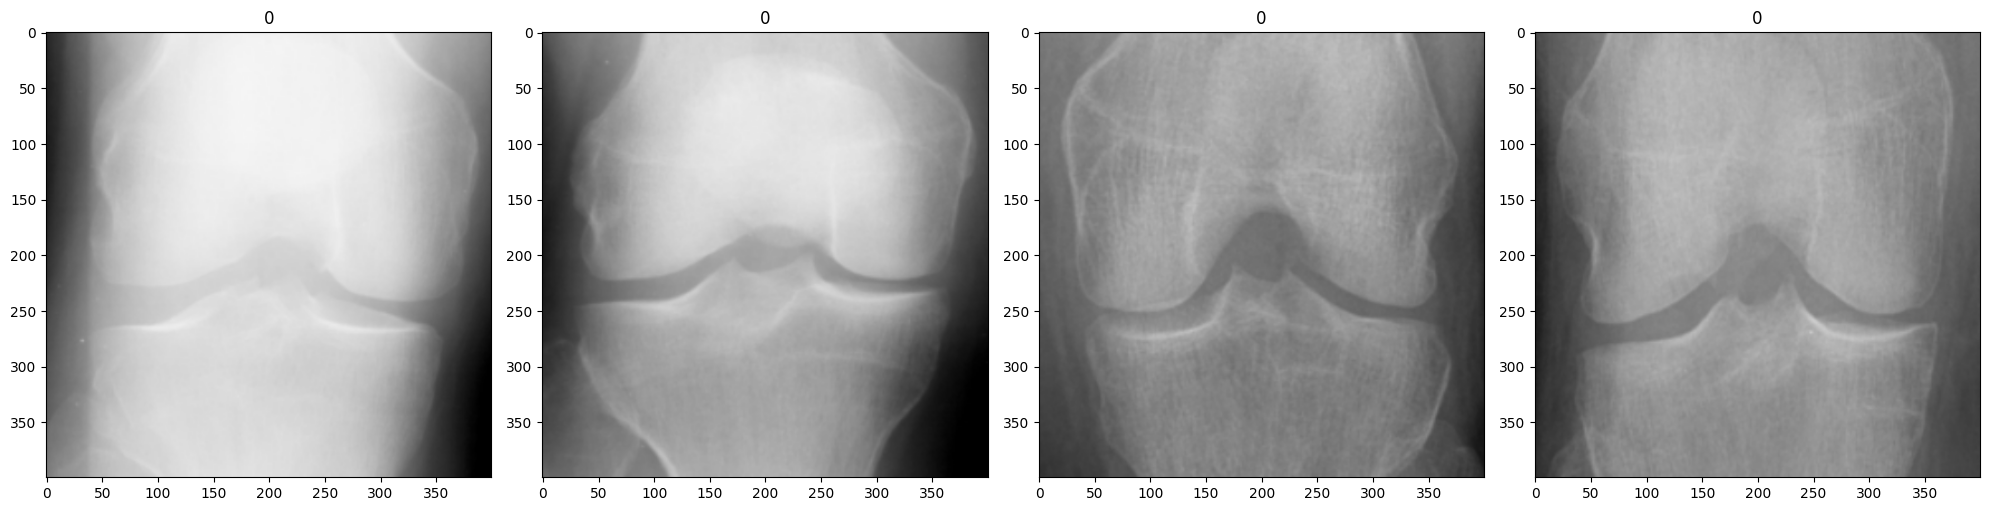

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


# Loop to display original and scaled images

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


plt.tight_layout()
plt.show()


In [7]:
# classes: 
# Retrieve class names from the directory structure
class_names = os.listdir(data_dir)
num_classes = len(class_names)  # Should be 2 for your case
print(f"Classes found: {class_names}")

Classes found: ['Osteoarthritis', 'Normal']


In [8]:


# Split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



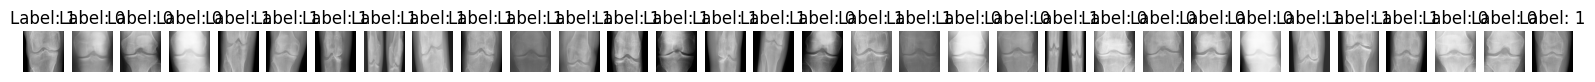

In [9]:
import matplotlib.pyplot as plt

# Create an iterator for the test dataset
test_iterator = test.as_numpy_iterator()

# Get a batch of images and their labels
test_batch = test_iterator.next()

# Display the images
fig, axes = plt.subplots(1, len(test_batch[0]), figsize=(20, 5))
for i in range(len(test_batch[0])):
    axes[i].imshow(test_batch[0][i].astype(int))  # Convert to int for display
    axes[i].set_title(f'Label: {test_batch[1][i]}')  # Set title as label
    axes[i].axis('off')  # Turn off axis

plt.show()


In [10]:


# Check the minimum and maximum values of the first image in the batch
image_test_tmp = test_batch[0][0]
print(f'Min pixel value: {image_test_tmp.min()}, Max pixel value: {image_test_tmp.max()}')


Min pixel value: 0.0, Max pixel value: 232.20843505859375


In [21]:
# standard | healthapp | pretrained (classification - not binary) | pretrained_binary
model_set_up = "pretrained_binary" 

if model_set_up == "standard" : 
    model = Sequential()

    model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(400,400,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(16, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    logdir='logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    hist = model.fit(train, steps_per_epoch=20, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


elif model_set_up == "healthapp" : 
    # Define the model
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(400, 400, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(learning_rate=0.01),  # Use `learning_rate` instead of `lr`
        metrics=['accuracy']
    )

    # Create a log directory for TensorBoard
    logdir = "logs"
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

    # Fit the model with the TensorBoard callback
    hist = model.fit(
        train, 
        steps_per_epoch=50, 
        epochs=5,
        validation_data=val,
        callbacks=[tensorboard_callback]  # Add the callback here
    )

elif (model_set_up == "pretrained_binary"):
    # Load the EfficientNetB0 model, excluding the top layers
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

    # Unfreeze some layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    # Add new top layers for binary classification
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Single output unit with sigmoid for binary classification
    ])

    # Compile the model for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model with the TensorBoard callback
    logdir = 'logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    hist = model.fit(
        train, 
        steps_per_epoch=10, 
        epochs=5,
        validation_data=val,
        callbacks=[tensorboard_callback]  # Add the callback here
    )


elif model_set_up == "pretrained":
    # Load the EfficientNetB0 model, excluding the top layers
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

    # Unfreeze some layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    # Add new top layers
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output for 2 classes
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model # original 
    # hist = model.fit(data, epochs=10)
    
    # Fit the model with the TensorBoard callback
    logdir='logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    hist = model.fit(
        train, 
        steps_per_epoch=10, 
        epochs=5,
        validation_data=val,
        callbacks=[tensorboard_callback]  # Add the callback here
    )

else: 
    print("no model")




Epoch 1/5
10/10 [==============================] - 66s 6s/step - loss: 0.3537 - accuracy: 0.8625 - val_loss: 1.7866 - val_accuracy: 0.5385
Epoch 2/5
10/10 [==============================] - 58s 6s/step - loss: 0.2337 - accuracy: 0.9250 - val_loss: 0.5050 - val_accuracy: 0.7212
Epoch 3/5
10/10 [==============================] - 56s 6s/step - loss: 0.1578 - accuracy: 0.9406 - val_loss: 0.9425 - val_accuracy: 0.6635
Epoch 4/5
10/10 [==============================] - 58s 6s/step - loss: 0.1254 - accuracy: 0.9688 - val_loss: 0.1481 - val_accuracy: 0.9688
Epoch 5/5
10/10 [==============================] - 34s 3s/step - loss: 0.1627 - accuracy: 0.9312 - val_loss: 0.1762 - val_accuracy: 0.9688


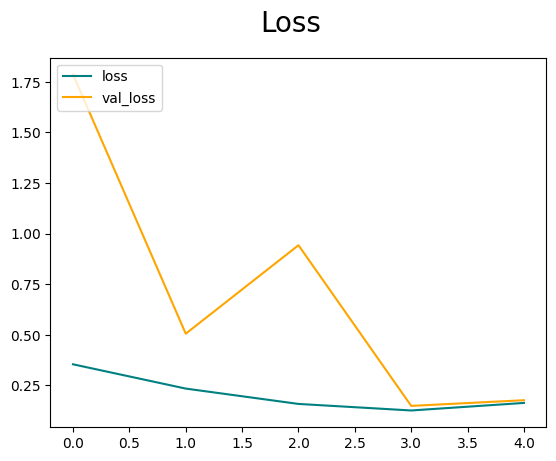

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

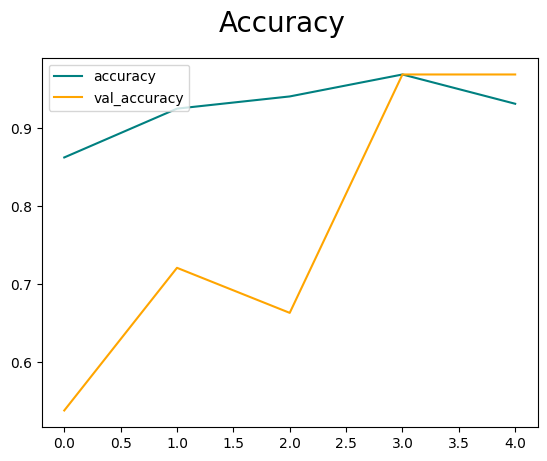

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np

if model_set_up == "pretrained":
    # Initialize the metrics
    pre = Precision()
    re = Recall()
    acc = BinaryAccuracy()

    # Loop through the test data
    for batch in test.as_numpy_iterator(): 
        X, y = batch
        yhat = model.predict(X)
        yhat = np.argmax(yhat, axis=1)  # Convert probabilities to class predictions
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)

    # Print the results of the metrics
    print(f'Precision: {pre.result().numpy()}')
    print(f'Recall: {re.result().numpy()}')
    print(f'Accuracy: {acc.result().numpy()}')
else: 

    pre = Precision()
    re = Recall()
    acc = BinaryAccuracy()

    for batch in test.as_numpy_iterator(): 
        X, y = batch
        yhat = model.predict(X)
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)


1/1 [==============================] - 1s 1s/step


In [25]:
print(pre.result(), re.result(), acc.result()) 


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.954023, shape=(), dtype=float32) tf.Tensor(0.9791667, shape=(), dtype=float32)


In [26]:
model_set_up

'pretrained_binary'

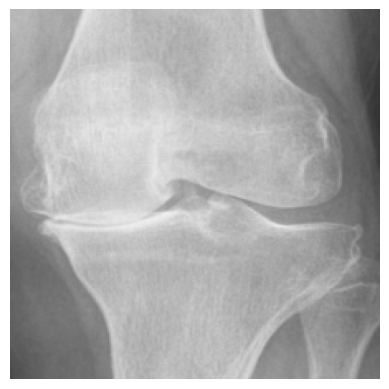

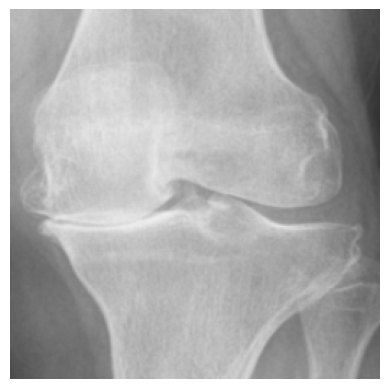

1/1 [==============================] - 0s 43ms/step
[[0.54952574]]
(1, 1)
Predicted class is arthritis


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image and ensure it is in RGB format
img_path = "/workspaces/ATAi_advance_notebooks/arthritis_data/itsarthritis.jpg"
# img_path = "/workspaces/ATAi_advance_notebooks/arthritis_data/notarthritis.jpg"


if model_set_up == "pretrained":
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display the original image without resizing
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis numbers and ticks
    plt.show()

    # Resize and normalize the image
    resize = tf.image.resize(img, (256, 256)) / 255.0  # Resize and normalize

    # Expand dimensions to match model input shape
    yhat = model.predict(np.expand_dims(resize, axis=0))  # Shape (1, 256, 256, 3)
    print(f"Prediction probabilities: {yhat}")

    # Check shape of yhat to ensure it's a single output
    print(f"Prediction shape: {yhat.shape}")

    # Use argmax to get the predicted class (0 or 1)
    predicted_class = np.argmax(yhat, axis=1)[0]
    print(f"Predicted class: {predicted_class}")

    # Classify based on prediction
    if predicted_class == 0:
        print(f'Predicted class is arthritis')
    else:
        print(f'Predicted class is not arthritis')

else: 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis numbers and ticks
    plt.show()

    # Resize and normalize the image
    if (model_set_up == "pretrained_binary") :
        resize = tf.image.resize(img, (256, 256)) / 255.0  # Resize and normalize in one line
    else :     
        resize = tf.image.resize(img, (400, 400))  # Resize and normalize in one line

    # Display the resized image
    plt.imshow(resize.numpy())  # Convert tensor to numpy array for display
    plt.axis('off')  # Optional: Turn off axis numbers and ticks
    plt.show()

    # Expand dimensions to match model input shape
    yhat = model.predict(np.expand_dims(resize, axis=0))  # Shape should be (1, 256, 256, 3)
    print(yhat)

    # Check shape of yhat to ensure it's a single output
    print(yhat.shape)

    # Classify based on prediction
    if yhat > 0.5: 
        print(f'Predicted class is arthritis')
    else:
        print(f'Predicted class is not arthritis')
